In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from Backend import read_dna_seq, dna
import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:
seqs = read_dna_seq('SouthAsia.fasta')

DNA = {}
for key in seqs.keys():
  d = dna(seqs[key])
  date = d.date
  feature = d.extract()
  DNA[key] = [date,feature]

X = []
Dates = []
for key in DNA.keys():
  Dates.append(DNA[key][0])
  X.append(DNA[key][1])
X = np.array(X)
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

[Text(167.4, 163.07999999999998, 'X[0] <= 0.51\ngini = 0.394\nsamples = 904\nvalue = [660, 244]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 660\nvalue = [660, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 244\nvalue = [0, 244]')]

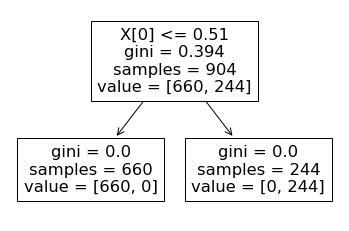

In [ ]:
ag = AgglomerativeClustering(2)
predictions = ag.fit_predict(X_t)

tree_agg = DecisionTreeClassifier()
tree_agg.fit(X_t,predictions)
plot_tree(tree_agg)

[Text(133.92000000000002, 181.2, 'X[1] <= 0.413\ngini = 0.399\nsamples = 904\nvalue = [655, 249]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 650\nvalue = [650, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= -0.347\ngini = 0.039\nsamples = 254\nvalue = [5, 249]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 249\nvalue = [0, 249]')]

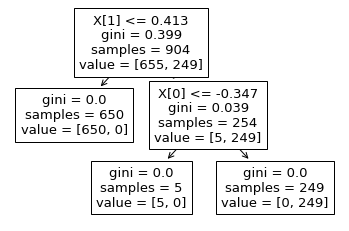

In [ ]:
km = KMeans(2)
predictions = km.fit_predict(X_t)

tree_km = DecisionTreeClassifier()
tree_km.fit(X_t,predictions)
plot_tree(tree_km)

In [ ]:
seqs = read_dna_seq('SouthAsia2021.fasta')

DNA = {}
for key in seqs.keys():
  d = dna(seqs[key])
  date = d.date
  feature = d.extract()
  DNA[key] = [date,feature]

X_test = []
Dates = []
for key in DNA.keys():
  Dates.append(DNA[key][0])
  X_test.append(DNA[key][1])
X_test = np.array(X_test)
X_test_s = scaler.transform(X_test)

In [ ]:
print('Accuracy of Decision Tree with labels from Agglomerative Clustering: \n',accuracy_score(tree_agg.predict(X_test_s), ag.fit_predict(X_test_s)))
print('Accuracy of Decision Tree with labels from Agglomerative Clustering and testing on labels from KMeans: \n',accuracy_score(tree_agg.predict(X_test_s), km.predict(X_test_s)))

Accuracy of Decision Tree with labels from Agglomerative Clustering: 
 0.9850746268656716
Accuracy of Decision Tree with labels from Agglomerative Clustering and testing on labels from KMeans: 
 0.9794776119402985


In [ ]:
print('Accuracy of Decision Tree with labels from KMean Clustering: \n',accuracy_score(tree_km.predict(X_test_s), km.predict(X_test_s)))
print('Accuracy of Decision Tree with labels from KMean Clustering and testing on labels from Agglomerative Clustering: \n',accuracy_score(tree_km.predict(X_test_s), ag.fit_predict(X_test_s)))

Accuracy of Decision Tree with labels from KMean Clustering: 
 0.9944029850746269
Accuracy of Decision Tree with labels from KMean Clustering and testing on labels from Agglomerative Clustering: 
 0.9813432835820896


In [ ]:
export_graphviz(tree_agg, out_file='tree_aglo.dot')
export_graphviz(tree_km, out_file='tree_km.dot')

In [ ]:
!dot -Tpng tree_aglo.dot -o tree.png
!dot -Tpng tree_km.dot -o tree_km.png